<a href="https://colab.research.google.com/github/atusharkm/hello-world/blob/master/BTPCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install lazypredict

     |████████████████████████████████| 248 kB 8.6 MB/s 
     |████████████████████████████████| 25.9 MB 847 bytes/s 
     |████████████████████████████████| 302 kB 46.8 MB/s 
     |████████████████████████████████| 1.2 MB 54.2 MB/s 
     |████████████████████████████████| 269 kB 62.8 MB/s 
     |████████████████████████████████| 14.5 MB 7.8 kB/s 
     |████████████████████████████████| 6.8 MB 23.3 MB/s 
     |████████████████████████████████| 72 kB 1.1 MB/s 
     |████████████████████████████████| 10.1 MB 30.2 MB/s 
     |████████████████████████████████| 127.6 MB 7.8 kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44635 sha256=afed24acc2e36dd04b32f3361a23b66f643b3de2940b5cec5e5f439622d59529
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfull

In [1]:
import lazypredict

In [2]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('Nusselt-I.csv', index_col = 0)

In [5]:
df.head()

,Re,TL_OUT,TU_OUT,Tb,Tb_max,PL_in,PL_out,PU_in,PU_out,hi,wc,ho,Dhi,Dho,Dh_m,vin,del_PL,del_PU,del_p,Rth,T_mean,h_mean,Nu,f
TF,,,,,,,,,,,,,,,,,,,,,,,,
0.26,200,297.44,295.19,302.45,303.53,41208.00,216.97,41208.00,215.59,833.33,100,216.67,178.57,136.84,157.71,1.13,40991.03,40992.41,40991.72,0.10,294.73,129575.64,34.06,0.26
0.28,200,297.49,295.22,302.50,303.58,38459.00,189.69,38458.00,188.56,820.31,100,229.69,178.27,139.34,158.80,1.13,38269.31,38269.44,38269.38,0.10,294.75,129073.89,34.16,0.24
0.30,200,297.55,295.25,302.54,303.63,36143.00,167.35,36143.00,167.49,807.69,100,242.31,177.97,141.57,159.77,1.13,35975.65,35975.51,35975.58,0.10,294.77,128783.00,34.29,0.23
0.32,200,297.60,295.29,302.59,303.68,34168.00,148.95,34167.00,149.05,795.45,100,254.55,177.66,143.59,160.63,1.13,34019.05,34017.95,34018.50,0.11,294.80,128328.52,34.36,0.21
0.34,200,297.65,295.32,302.63,303.72,32462.00,133.97,32461.00,133.73,783.58,100,266.42,177.36,145.42,161.39,1.13,32328.03,32327.27,32327.65,0.11,294.82,128000.00,34.43,0.20


In [6]:
row, col= df.shape

In [7]:
print(row, col)

80 24


In [8]:
sns.set()

In [9]:
corr=df.corr()

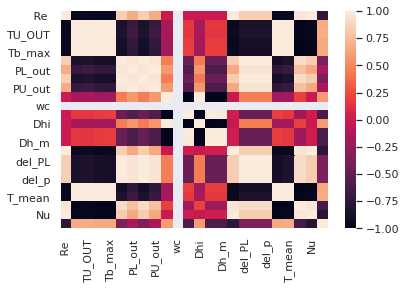

In [10]:
sns.heatmap(corr)

In [11]:
X = df[df.columns[range(23)]]
y=df['Nu']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25,random_state =42)

reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)


print(models)

100%|██████████| 42/42 [00:01<00:00, 25.82it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
KernelRidge                               1005.76    -210.53 38.54        0.02
MLPRegressor                               173.55     -35.33 15.97        0.16
GaussianProcessRegressor                    23.62      -3.76  5.78        0.02
LassoLars                                    5.79      -0.01  2.66        0.02
DummyRegressor                               5.79      -0.01  2.66        0.01
Lasso                                        1.70       0.85  1.01        0.02
LGBMRegressor                                1.45       0.91  0.81        0.03
HistGradientBoostingRegressor                1.38       0.92  0.75        0.07
ExtraTreeRegressor                           1.38       0.92  0.75        0.02
ElasticNet                                   1.35       0.93  0.72        0.01
KNeighborsRegressor                          1.10   

In [13]:
print(X)

       Re   TL_OUT  TU_OUT     Tb  Tb_max  ...    del_p  Rth  T_mean    h_mean    Nu
TF                                         ...                                      
0.26   200  297.44  295.19 302.45  303.53  ... 40991.72 0.10  294.73 129575.64 34.06
0.28   200  297.49  295.22 302.50  303.58  ... 38269.38 0.10  294.75 129073.89 34.16
0.30   200  297.55  295.25 302.54  303.63  ... 35975.58 0.10  294.77 128783.00 34.29
0.32   200  297.60  295.29 302.59  303.68  ... 34018.50 0.11  294.80 128328.52 34.36
0.34   200  297.65  295.32 302.63  303.72  ... 32327.65 0.11  294.82 128000.00 34.43
...    ...     ...     ...    ...     ...  ...      ...  ...     ...       ...   ...
0.48   600  295.36  293.94 300.47  301.34  ... 95515.93 0.08  293.90 152207.00 41.84
0.50   600  295.38  293.95 300.50  301.38  ... 91727.60 0.08  293.91 151687.52 41.78
0.52   600  295.40  293.96 300.52  301.42  ... 88284.81 0.08  293.92 151400.45 41.78
0.54   600  295.43  293.98 300.55  301.45  ... 85143.10 0.08  293

In [14]:
print(y)

TF
0.26   34.06
0.28   34.16
0.30   34.29
0.32   34.36
0.34   34.43
        ... 
0.48   41.84
0.50   41.78
0.52   41.78
0.54   41.74
0.56   41.66
Name: Nu, Length: 80, dtype: float64


In [15]:
print(y_train)

TF
0.44   34.48
0.26   41.70
0.36   34.44
0.56   38.73
0.30   38.76
0.54   40.31
0.46   38.92
0.38   40.56
0.26   36.56
0.40   38.95
0.42   40.52
0.56   41.66
0.40   34.51
0.30   40.39
0.36   40.51
0.32   36.87
0.30   41.87
0.44   37.03
0.50   38.87
0.52   34.44
0.50   41.78
0.32   34.36
0.28   36.70
0.38   38.92
0.42   34.48
0.28   41.80
0.38   34.49
0.34   38.86
0.42   41.93
0.46   40.49
0.54   38.80
0.54   41.74
0.56   34.36
0.48   36.99
0.44   38.92
0.46   36.98
0.26   40.21
0.42   37.00
0.48   38.88
0.52   41.78
0.44   40.52
0.48   34.46
0.26   38.55
0.48   41.84
0.48   40.46
0.56   40.31
0.36   41.96
0.36   38.92
0.52   36.91
0.28   34.16
0.34   40.53
0.36   36.95
0.30   34.29
0.40   37.01
0.46   41.88
0.34   36.92
0.50   40.42
0.40   42.02
0.54   34.41
0.32   40.49
Name: Nu, dtype: float64


In [16]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)


offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:03<00:00, 13.85it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
SVR                                          0.83       0.88  2.62        0.03
BaggingRegressor                             0.83       0.88  2.63        0.05
NuSVR                                        0.82       0.86  2.76        0.04
RandomForestRegressor                        0.81       0.86  2.79        0.37
XGBRegressor                                 0.81       0.86  2.79        0.10
GradientBoostingRegressor                    0.81       0.86  2.84        0.18
ExtraTreesRegressor                          0.79       0.84  2.98        0.22
HistGradientBoostingRegressor                0.77       0.83  3.06        0.29
AdaBoostRegressor                            0.77       0.83  3.06        0.12
PoissonRegressor                             0.77       0.83  3.11        0.02
LGBMRegressor                                0.77   



> Indented block

